<a href="https://colab.research.google.com/github/MrD0balina/Fourth-Year-Project---Neutrino-Oscillations/blob/main/First_Notebook_SEM2_Consolidating_SEM_1_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


from scipy import interpolate
from scipy.interpolate import CubicSpline


from textwrap import wrap
from math import cos
from math import pi
from math import log

import math
import pandas as pd

import scipy

import matplotlib.patches as patches

In [2]:
# Pion_Plots_df1 = pd.read_csv('Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')

Pion_Plots_df1 = pd.read_csv('Copy of Week 6 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8 - Pion Plots TABLE 1 CSV - Copy - Now Saved as UTF 8.csv')


## Renaming all of the columns of the dataframe using entries in the first row.
header_column_names = Pion_Plots_df1.loc[0, :].values.flatten().tolist()
Pion_Plots_df1 = Pion_Plots_df1.set_axis( header_column_names , axis = 1  )

## Removing the extra row.
Pion_Plots_df1 = Pion_Plots_df1.drop(0)
Pion_Plots_df1.columns = ['pz (GeV=c)',
                          'pT (GeV=c)',
                          '$N_{\pi^+}/POT$ (per proton on target)',
                          'ðN(pi^+) stat + bkgd (%)',
                          'ðN(pi^+) syst (%)',
                          '$N_{\pi^-}/POT$ (per proton on target)',
                          'ðN(pi^-) stat + bkgd (%)',
                          'ðN(pi^-) syst (%)',
                          'R = N(pi^-) / N(pi^+)',
                          'ðR stat + bkgd (%)',
                          'ðR syst (%)']


In [3]:
display(Pion_Plots_df1)

,pz (GeV=c),pT (GeV=c),$N_{\pi^+}/POT$ (per proton on target),ðN(pi^+) stat + bkgd (%),ðN(pi^+) syst (%),$N_{\pi^-}/POT$ (per proton on target),ðN(pi^-) stat + bkgd (%),ðN(pi^-) syst (%),R = N(pi^-) / N(pi^+),ðR stat + bkgd (%),ðR syst (%)
1,"[0.30,0.50)","[0.00,0.10)",3.32E-01,0.97,9.77,2.76E-01,0.86,9.09,0.84,1.29,5.19
2,"[0.30,0.50)","[0.10,0.20)",3.25E-01,1.05,4.86,3.56E-01,0.75,4.93,1.08,1.29,4.64
3,"[0.30,0.50)","[0.20,0.30)",1.93E-01,1.46,5.30,1.91E-01,1.09,5.24,1,1.82,4.59
4,"[0.30,0.50)","[0.30,0.40)",1.06E-01,1.97,8.15,9.49E-02,1.68,7.39,0.95,2.59,4.61
5,"[0.50,0.62)","[0.00,0.10)",9.20E-02,1.22,5.10,7.54E-02,1.16,4.98,0.83,1.69,4.59
...,...,...,...,...,...,...,...,...,...,...,...
120,"[56.00,68.00)","[0.50,2.00)",2.81E-03,2.77,4.79,1.03E-03,4.51,5.04,0.36,5.29,4.58
121,"[68.00,80.00)","[0.20,0.30)",2.36E-04,10.32,5.45,NaN,NaN,NaN,NaN,NaN,NaN
122,"[68.00,80.00)","[0.30,0.40)",1.88E-04,10.39,4.89,NaN,NaN,NaN,NaN,NaN,NaN
123,"[68.00,80.00)","[0.40,0.50)",1.88E-04,10.15,4.80,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
interval_mid_list = []
bin_width_list = []
pT_colour_code_list = []


for i in range(len(Pion_Plots_df1['pz (GeV=c)'])):

  i = i + 1
  X = Pion_Plots_df1['pz (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  diff = abs( ( Z[0] - Z[1] ) / 2  )
  bin_width_list.append(diff)

  interval_mid_value = min(Z) + diff
  diff = 0
  interval_mid_list.append(interval_mid_value)

  X = Pion_Plots_df1['pT (GeV=c)'][i]
  Y = X [ 1 : -1 ]
  Z =  Y.split(",")

  for j in range(len(Z)):
    Z[j] = float(Z[j])

  if Z[0] == 0.00:
    colour_code = 0
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.10:
    colour_code = 1
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.20:
    colour_code = 2
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.30:
    colour_code = 3
    #pT_colour_code_list.append(colour_code)
  elif Z[0] == 0.40:
    colour_code = 4
    #pT_colour_code_list.append(colour_code)
  else:
    colour_code = 5
    #pT_colour_code_list.append(colour_code)

  pT_colour_code_list.append(colour_code)


bin_width_array = np.array(bin_width_list)
interval_mid_array = np.array(interval_mid_list)
pT_colour_code_array = np.array(pT_colour_code_list)


## Adding new columns to the dataframe

Pion_Plots_df1['pz (GeV=c) - mid range value'] = interval_mid_array.tolist()
column_to_move = Pion_Plots_df1.pop("pz (GeV=c) - mid range value") # storing a ccolumn in the dataframe as a neew variable
Pion_Plots_df1.insert(1, "pz (GeV=c) - mid range value", column_to_move) # moving the stored column to the desired place in the dataframe.
Pion_Plots_df1['bin width'] = bin_width_array.tolist()
column_to_move = Pion_Plots_df1.pop("bin width")
Pion_Plots_df1.insert(2, "bin width", column_to_move)
Pion_Plots_df1['pT (GeV=c) - plot colour codes'] = pT_colour_code_array.tolist()
column_to_move = Pion_Plots_df1.pop("pT (GeV=c) - plot colour codes")
Pion_Plots_df1.insert(3, "pT (GeV=c) - plot colour codes", column_to_move)


## Converting columns into floats - in order to make plotting possible

Pion_Plots_df1["N_{\pi^+}/POT --- float"] = Pion_Plots_df1["$N_{\pi^+}/POT$ (per proton on target)"].astype(float)
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT --- float")
Pion_Plots_df1.insert(5, "N_{\pi^+}/POT --- float", column_to_move)

## Creating a column that contains the heights of each bin's bar, and moving to the desired location in the dataframe.

Pion_Plots_df1["N_{\pi^+}/POT / bin width"]  =  Pion_Plots_df1["N_{\pi^+}/POT --- float"] / Pion_Plots_df1["bin width"]    # ----> Divide the count by the bin width.  Thus, when we make the height of each bin the count divided by the bin width, the total area of the bin is equal to the count in that particular bin.
column_to_move = Pion_Plots_df1.pop("N_{\pi^+}/POT / bin width")
Pion_Plots_df1.insert(6, "N_{\pi^+}/POT / bin width", column_to_move)

## Creating new column in which the weighted heights of the histogram bars are stored.

Pion_Plots_df1["Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]

#################### Using df.loc - this is in line with the Copy on Write - Old way is through Chained Assignment (for loop etc., etc.) ####################

Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 0, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"]
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 1, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 3
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 2, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 10
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 3, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 30
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 4, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 100
Pion_Plots_df1.loc[Pion_Plots_df1["pT (GeV=c) - plot colour codes"] == 5, "Final pi^+ plot value"] = Pion_Plots_df1["N_{\pi^+}/POT / bin width"] * 300

## Final reorganisation of columns in the dataframe

column_to_move = Pion_Plots_df1.pop("Final pi^+ plot value")
Pion_Plots_df1.insert(8, "Final pi^+ plot value", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)

column_to_move = Pion_Plots_df1.pop("$N_{\pi^+}/POT$ (per proton on target)")
Pion_Plots_df1.insert(5, "$N_{\pi^+}/POT$ (per proton on target)", column_to_move)


## Adding two columns for plotting purposes

Pion_Plots_df1["error bar capsize"] = float(1)
Pion_Plots_df1["error bar line width"] = float(0.5)


In [5]:
######################### SELECTING THE PIONS WITH SUFFICIENT ENERGY - BY REMOVING PIONS WITH LONGITUDINAL MOMENTUM LESS THAN 5GeV/c  ######################

######################### SEE COMMENT AT END OF FIRST LINE ######################


# # colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
green_dots_new_x = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list >= 5]
green_dots_new_y = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_new_x) ) : len(green_dots_only_y_axis_values_list) ]  )

red_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['Final pi^+ plot value'] )
red_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 1  ]['pz (GeV=c) - mid range value'] )
red_dots_new_x = [red_dots_only_x_axis_values_list for red_dots_only_x_axis_values_list in red_dots_only_x_axis_values_list if red_dots_only_x_axis_values_list >= 5]
red_dots_new_y = ( red_dots_only_y_axis_values_list[  len(red_dots_only_y_axis_values_list)  - ( len(red_dots_new_x) ) : len(red_dots_only_y_axis_values_list) ]  )

blue_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['Final pi^+ plot value'] )
blue_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 0  ]['pz (GeV=c) - mid range value'] )
blue_dots_new_x = [blue_dots_only_x_axis_values_list for blue_dots_only_x_axis_values_list in blue_dots_only_x_axis_values_list if blue_dots_only_x_axis_values_list >= 5 ]
blue_dots_new_y = ( blue_dots_only_y_axis_values_list[  len(blue_dots_only_y_axis_values_list)  - ( len(blue_dots_new_x) ) : len(blue_dots_only_y_axis_values_list) ] )

purple_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['Final pi^+ plot value'] )
purple_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 3  ]['pz (GeV=c) - mid range value'] )
purple_dots_new_x = [purple_dots_only_x_axis_values_list for purple_dots_only_x_axis_values_list in purple_dots_only_x_axis_values_list if purple_dots_only_x_axis_values_list >= 5 ]
purple_dots_new_y = ( purple_dots_only_y_axis_values_list[  len(purple_dots_only_y_axis_values_list)  - ( len(purple_dots_new_x) ) : len(purple_dots_only_y_axis_values_list) ] )

orange_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['Final pi^+ plot value'] )
orange_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 4  ]['pz (GeV=c) - mid range value'] )
orange_dots_new_x = [orange_dots_only_x_axis_values_list for orange_dots_only_x_axis_values_list in orange_dots_only_x_axis_values_list if orange_dots_only_x_axis_values_list >= 5 ]
orange_dots_new_y = ( orange_dots_only_y_axis_values_list[ len(orange_dots_only_y_axis_values_list)  - ( len(orange_dots_new_x) ) : len(orange_dots_only_y_axis_values_list) ] )

brown_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['Final pi^+ plot value'] )
brown_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 5  ]['pz (GeV=c) - mid range value'] )
brown_dots_new_x = [brown_dots_only_x_axis_values_list for brown_dots_only_x_axis_values_list in brown_dots_only_x_axis_values_list if brown_dots_only_x_axis_values_list >= 5 ]
brown_dots_new_y = ( brown_dots_only_y_axis_values_list[ len(brown_dots_only_y_axis_values_list)  - ( len(brown_dots_new_x) ) : len(brown_dots_only_y_axis_values_list) ] )



In [6]:
print(len(green_dots_only_y_axis_values_list))
print(len(green_dots_new_x))
print(len(green_dots_only_y_axis_values_list))
print(len(green_dots_new_y))
print(len(blue_dots_only_y_axis_values_list))
print(len(blue_dots_new_y))

23
15
23
15
22
14


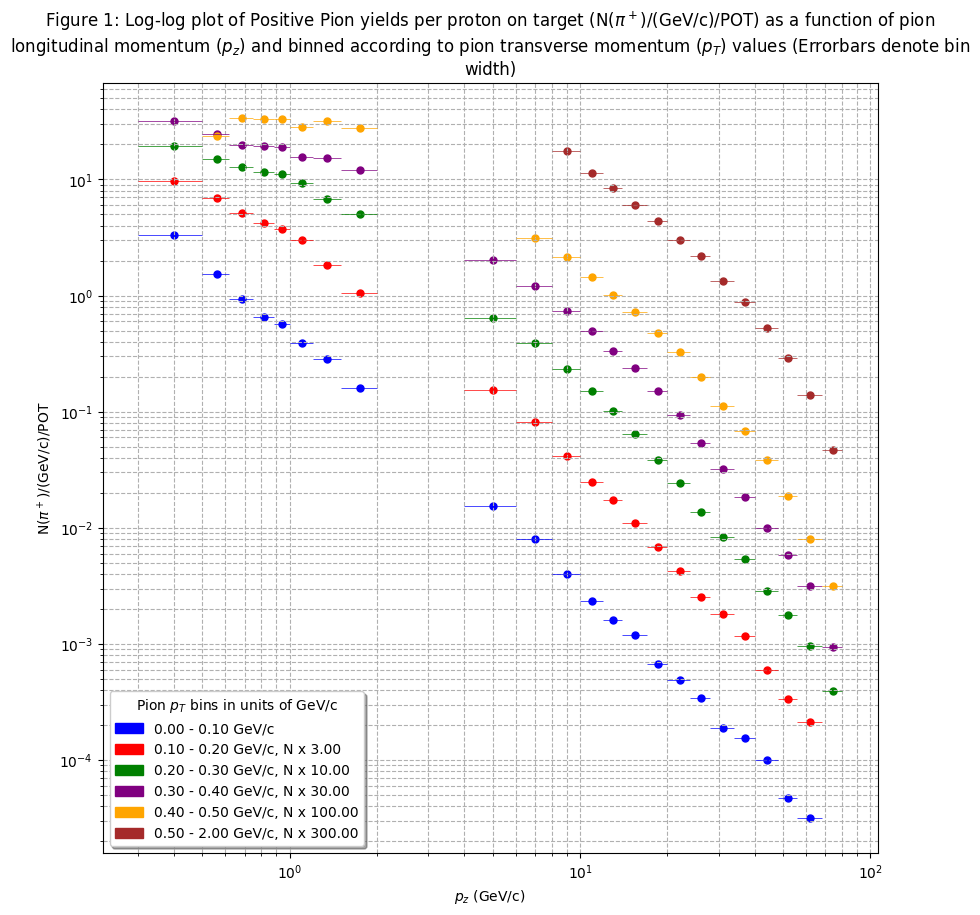

In [7]:
## Log-Log PLOT WITH ERROR BARS ##

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )

###################### THESE ERROR BAR PLOT ATTEMPTS FAILED ###########################

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"] * 300 , yerr  =  None , xerr = Pion_Plots_df1["bin width"] , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"] )

#plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5 , capsize  = Pion_Plots_df1["error bar capsize"])

# plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
#             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = Pion_Plots_df1["error bar line width"] )

###################### THESE ERROR BAR PLOT ATTEMPTS FAILED ###########################

plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )


plt.xscale("log")
plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 1: Log-log plot of Positive Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Log-log plot of Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

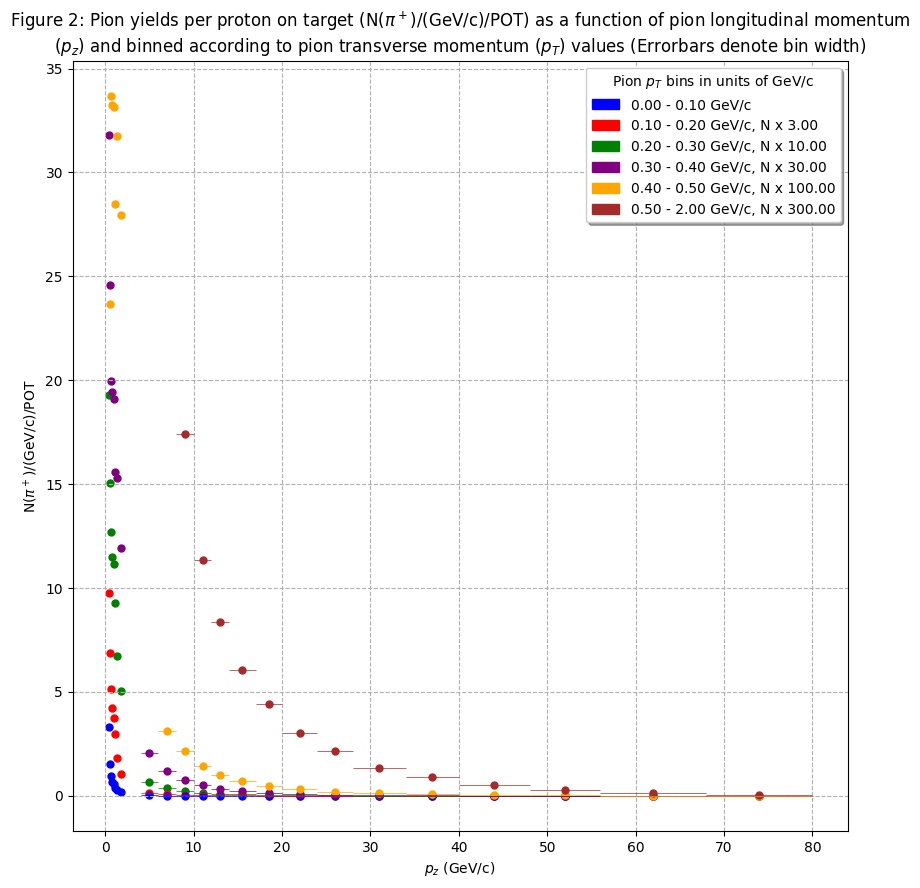

In [9]:
##  Linear PLOT WITHOUT ERROR BARS ##
colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )


plt.errorbar( x = Pion_Plots_df1["pz (GeV=c) - mid range value"] , y = Pion_Plots_df1["Final pi^+ plot value"], yerr  =  None , xerr = Pion_Plots_df1["bin width"] ,
             ls = None , fmt = 'none' , ecolor = Pion_Plots_df1["pT (GeV=c) - plot colour codes"].map(colours), elinewidth = 0.5  )


plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 2: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

<ipython-input-16-82fca5937675>:42: MatplotlibDeprecationWarning: Passing label as a length 7 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )


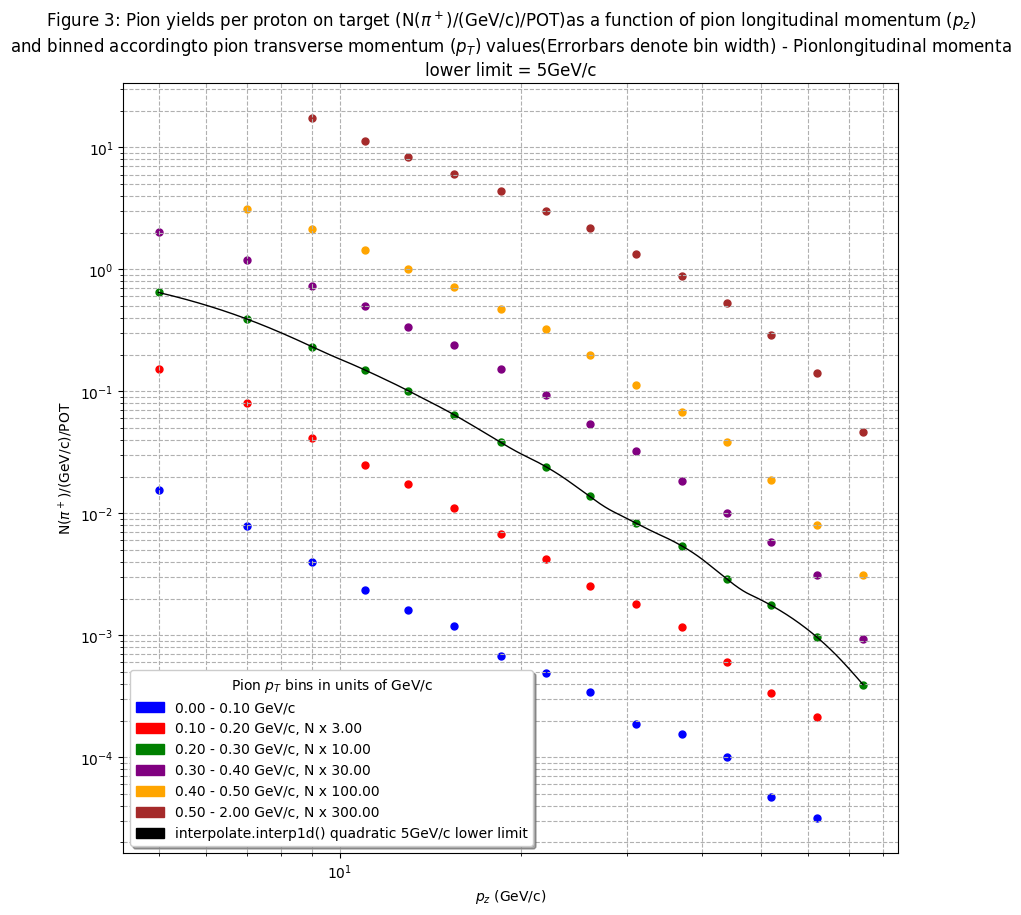

In [16]:
######################### LIMITING INTERPOLATION TO A NARROW RANGE OF PIONS IN TERMS OF THEIR LONGITUDINAL MOMENTA - THE LIMITED LISTS WERE PRODUCED IN A CELL ABOVE THIS ONE ######################

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ,  "interpolate.interp1d() quadratic 5GeV/c lower limit"   ]


blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')
black_patch = mpatches.Patch(color='black', label="interpolate.interp1d() quadratic")


handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ,  black_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_new_x   ,   y = purple_dots_new_y   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_new_x   ,   y = orange_dots_new_y   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_new_x   ,   y = brown_dots_new_y   ,   c = "brown" , s = 25 , label =  labels_list )

#############################################################################################################################
#############################################################################################################################

              ######################  CHOSEN INTERPOLATOR DEFINED HERE  #################################

xnew_array = np.linspace(min(green_dots_new_x), max(green_dots_new_x), 1000)
green_dots_new_x_array = np.array(green_dots_new_x)
green_dots_new_y_array = np.array(green_dots_new_y)
chosen_interpolator = interpolate.interp1d(   green_dots_new_x_array  ,    green_dots_new_y_array , kind = "quadratic" , bounds_error = False  )
ynew_array = chosen_interpolator(xnew_array)

plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )

#############################################################################################################################
#############################################################################################################################

plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 3: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT)" \
                          "as a function of pion longitudinal momentum ($p_{z}$) and binned according" \
                          "to pion transverse momentum ($p_{T}$) values(Errorbars denote bin width) - Pion" \
                          "longitudinal momenta lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 3 Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta - Pion longitudinal momenta lower limit is 5GeVc .png' , dpi=200 , bbox_inches = "tight")


plt.show()

<ipython-input-17-d10bddd57e1d>:44: MatplotlibDeprecationWarning: Passing label as a length 7 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )


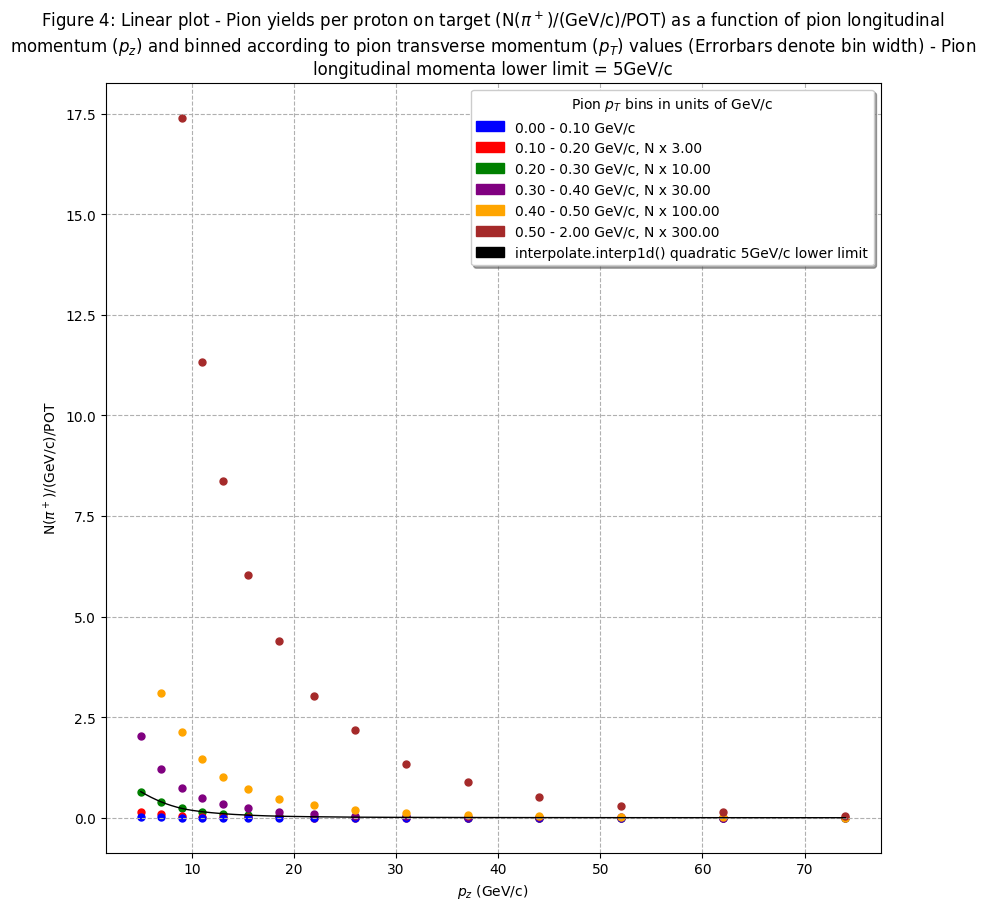

In [17]:
################# AND NOW A LINEAR PLOT OF THE ABOVE LOG-LOG PLOT #################

######################### LIMITING INTERPOLATION TO A NARROW RANGE OF PIONS IN TERMS OF THEIR LONGITUDINAL MOMENTA ######################

colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00"  ,  "interpolate.interp1d() quadratic 5GeV/c lower limit"   ]


blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')
black_patch = mpatches.Patch(color='black', label="interpolate.interp1d() quadratic")


handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch ,  black_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.scatter(   x = green_dots_new_x   ,   y = green_dots_new_y   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_new_x   ,   y = red_dots_new_y   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_new_x   ,   y = blue_dots_new_y   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_new_x   ,   y = purple_dots_new_y   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_new_x   ,   y = orange_dots_new_y   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_new_x   ,   y = brown_dots_new_y   ,   c = "brown" , s = 25 , label =  labels_list )

#############################################################################################################################
#############################################################################################################################

              ######################  CHOSEN INTERPOLATOR DEFINED HERE  #################################

xnew_array = np.linspace(min(green_dots_new_x), max(green_dots_new_x), 1000)
green_dots_new_x_array = np.array(green_dots_new_x)
green_dots_new_y_array = np.array(green_dots_new_y)
chosen_interpolator = interpolate.interp1d(   green_dots_new_x_array  ,    green_dots_new_y_array , kind = "quadratic" , bounds_error = False  )
ynew_array = chosen_interpolator(xnew_array)

plt.plot(  xnew_array  , ynew_array  , color = "black" , label =  labels_list  , linewidth = 1  )

#############################################################################################################################
#############################################################################################################################

# plt.xscale("log")
# plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 4: Linear plot - Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width) - Pion longitudinal momenta lower limit = 5GeV/c" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure 4 - Linear plot - Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta - Pion longitudinal momenta lower limit is 5GeVc .png' , dpi=200 , bbox_inches = "tight")


plt.show()

This interpolator (interpolate.interp1d() quadratic) was used to produce histograms.
# **** Would be nice to get some of those histograms directly below this plot.


# ****Were the histograms this interpolator generated the really spikey ones?

# **** We need to have all the interpolators we used next to the histograms they generated.

In [ ]:
          # STRATEGY:
          # You will need to cross check both of the collab documents that are titled "Last Modified Thursday .... "
          # Establish what we did with the wightings
          # Try and find out how we progressed from one interpolator to the next.
          # Including what data points we did and did not exclude from the fitting data.
          # I think.... we decided at the end of to fit an exponential function to the whole data sets (all the green dots, or all the red dots, or all of any one particular colour)
          # If this is what we decided to do, then go and do that fitting and produce new histograms.
          # The TO DO LIST BELOW WILL HELP.
          # Can't remember what we said about a cut off angle and change to weightings?


          # Produce a notebook with all developments in one place, and all plots.


# Weighting pions according to their longitudinal velocities.
.
.
# QUESTIONS:
## What does this weighting do exactly?  How does the plotted theta max function weight the pions?
## Why does the plotted line disappear when theta is between 0.3 and 2.9?
## There are nan values in the "cos_theta_star" array as soon as theta creeps above 0.00297 - these nans then cause there to be nanas in the other arrays below.
## I also have nan values in the "array_product" array
## Due to there being nan values in the "total_E_pi" and "theta_max" arrays.


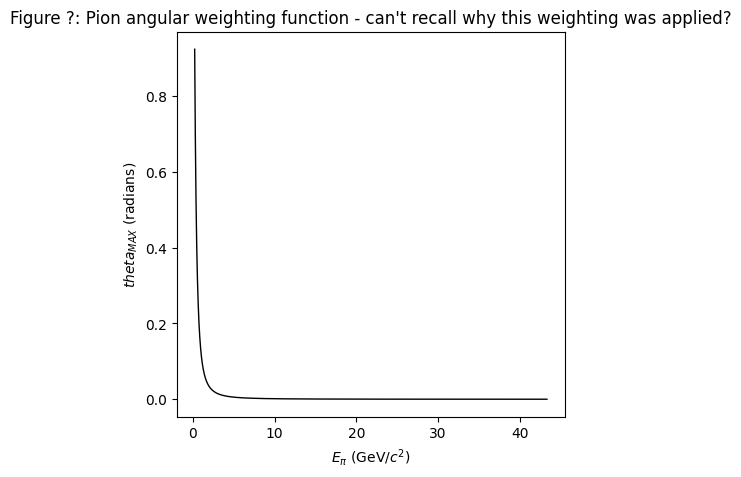

In [114]:
E_v_star = 29.8 * ( 10 ** -3 )   # "star" denotes quantities in the pion rest frame
m_pi = 139.6 * ( 10 ** -3 )

theta = 0.00297     # Is this in degrees or radians?
E_v = np.linspace( 0.1 , 10 , 10000000 )
my_mean = 120           # Mean pion energy in NuMI beam
my_std = 1.2            # An estimated standard deviation in the gaussian distribution of pion energies (NEED ACTUAL FIGURE - need information on )

cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

total_E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

relativistic_KE_pi =  (  ( ( total_E_pi ) ** 2 ) - ( ( m_pi ) ** 2 )  )

gamma_array = ( ( relativistic_KE_pi / m_pi ) + 1 )

beta_array = (  ( 1 - ( 1 / ( ( gamma_array ) ** 2 ) ) ) ** ( 1 / 2 )  )

theta_max = np.arctan(  1 / (beta_array * gamma_array) )   ### Why did we call this theta max? The "An Off-Axis Neutrino Beam" document calls it "theta characteristic" or theta_{c}.

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

# plt.scatter(   x = total_E_pi   ,   y = theta_max   ,   c = "green" , s = 5 )

plt.plot(  total_E_pi  , theta_max  , color = "black" , label =  "interpolate.interp1d() quadratic" , linewidth = 1  )

plt.xlabel(r"$E_{\pi}$ (GeV/$c^2$)")
plt.ylabel(r"$theta_{MAX}$ (radians)")

plt.title("\n".join(wrap(r"Figure ?: Pion angular weighting function - can't recall why this weighting was applied?" , 120 ) ) )

plt.show()

##Code for counting number of NaNs and non-NaNs in arrays

In [146]:
print(cos_theta_star)
np.count_nonzero(~np.isnan(cos_theta_star))
np.count_nonzero(np.isnan(cos_theta_star))

[0.99995033 0.99995033 0.99995033 ... 0.08182115 0.08181995 0.08181875]
[ True  True  True ...  True  True  True]


# ****Perhaps this integration approach is wrong, and we only need the y-value of the above graph.  Try plotting histograms wher you only take the y_value.



# QUESTIONS:
## Should I be integrating in the cell below?
## Not sure what this cell actually does?

## I have nan values in the "integral_weights_array" array

In [147]:
############# Attempting to integrate the above plot ################

def trapezoid(x_axis, y_axis):
    """Integrate d using the trapezoid rule and return the value of the integral

    d: array of data points evaluated at even spacing h (Each value in this array can be considered as a length of one of the parallel sides of a trapezium)
    h: spacing between data points (the height of each trapezium)

    """

    a = np.ones_like(x_axis)
    b = a.size          # Constructing weights array
    a[b-1] = 1/2        # Constructing weights array
    a[0] = 1/2          # Constructing weights array
    array_product = x_axis * a

    integral_weights_array = y_axis*array_product

    I = sum(integral_weights_array)

    return I , integral_weights_array

In [148]:
I , integral_weights_array = trapezoid( total_E_pi , theta_max )

In [149]:
print(integral_weights_array)

[0.10817701 0.21635423 0.21635445 ... 0.00322362 0.00322362 0.00161181]


# ****WHY WERE WE SO CONCERNED WITH LIMITING OURSELVES TO A CERTAIN RANGE OF THE DATA?

In [150]:
## These two lines from the code that generated the coordinates for the coloured dots ##
green_dots_only_y_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['Final pi^+ plot value'] )
green_dots_only_x_axis_values_list = list( Pion_Plots_df1 [Pion_Plots_df1 ['pT (GeV=c) - plot colour codes'] == 2  ]['pz (GeV=c) - mid range value'] )
## These two lines from the code that generated the coordinates for the coloured dots ##

#######################################################################################################
########################## THIS IS THE CORRECT WAY TO BUILD THE DESIRED LISTS #########################

green_dots_x_0_10 = []
green_dots_y_0_10 = []


for i in range(len(green_dots_only_x_axis_values_list)):
    if green_dots_only_x_axis_values_list[i] <= 10:
        green_dots_x_0_10.append(green_dots_only_x_axis_values_list[i])
        green_dots_y_0_10.append(green_dots_only_y_axis_values_list[i])


green_dots_x_1point5_10 = []
green_dots_y_1point5_10 = []


for i in range(len(green_dots_only_x_axis_values_list)):
    if ( green_dots_only_x_axis_values_list[i] >=1.5 ) and ( green_dots_only_x_axis_values_list[i] <= 10 ):
        green_dots_x_1point5_10.append(green_dots_only_x_axis_values_list[i])
        green_dots_y_1point5_10.append(green_dots_only_y_axis_values_list[i])

#######################################################################################################
#######################################################################################################

green_dots_only_x_axis_values_list_10 = [green_dots_only_x_axis_values_list for green_dots_only_x_axis_values_list in green_dots_only_x_axis_values_list if green_dots_only_x_axis_values_list <= 10]
# print(green_dots_only_x_axis_values_list_10)

green_dots_x_only_between_1_5_and_10 = green_dots_only_x_axis_values_list_10[7:]
# print(green_dots_x_only_between_1_5_and_10)


green_dots_only_y_axis_values_list_10 = ( green_dots_only_y_axis_values_list[  len(green_dots_only_y_axis_values_list)  - ( len(green_dots_x_only_between_1_5_and_10) ) : len(green_dots_only_y_axis_values_list) ]  )
# print(green_dots_only_y_axis_values_list_10)

green_dots_y_only_between_1_5_and_10 = green_dots_only_y_axis_values_list_10   ######### PROBLEM HERE???
# print(green_dots_y_only_between_1_5_and_10)

#####################
#####################

green_dots_only_y_axis_values_list_10 = green_dots_only_x_axis_values_list[7:]            ############# SOLUTION?

#####################
#####################

print(len(green_dots_x_0_10))
print("This is the green_dots_x_0_10", green_dots_x_0_10)
print(len(green_dots_y_0_10))
print("This is the green_dots_y_0_10", green_dots_y_0_10)
print("\n")
print("\n")
print(len(green_dots_x_1point5_10))
print("This is the green_dots_x_1point5_10", green_dots_x_1point5_10)
print(len(green_dots_y_1point5_10))
print("This is the green_dots_y_1point5_10", green_dots_y_1point5_10)
print("\n")
print("\n")

11
This is the green_dots_x_0_10 [0.4, 0.56, 0.685, 0.815, 0.94, 1.1, 1.35, 1.75, 5.0, 7.0, 9.0]
11
This is the green_dots_y_0_10 [19.3, 15.05, 12.707692307692309, 11.476923076923075, 11.133333333333333, 9.270000000000003, 6.7333333333333325, 5.04, 0.6469999999999999, 0.393, 0.23199999999999998]




4
This is the green_dots_x_1point5_10 [1.75, 5.0, 7.0, 9.0]
4
This is the green_dots_y_1point5_10 [5.04, 0.6469999999999999, 0.393, 0.23199999999999998]






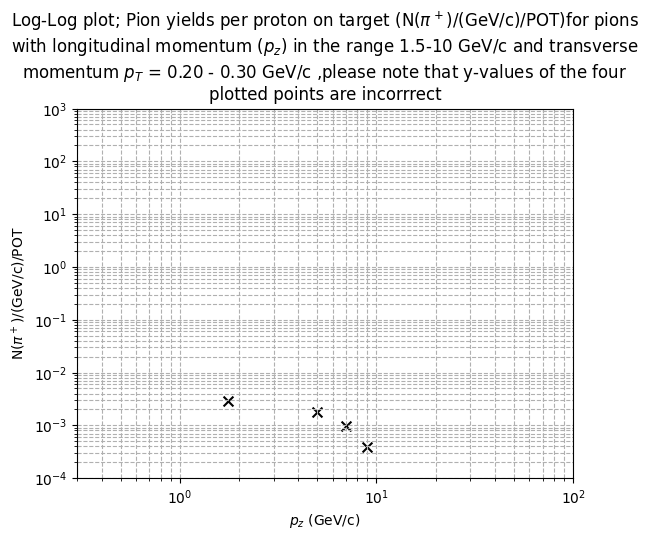

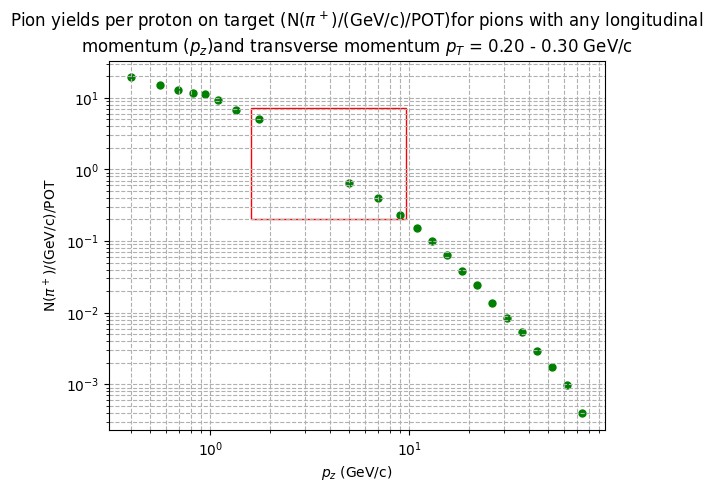

In [151]:
plt.scatter(   x = green_dots_x_only_between_1_5_and_10   ,   y = green_dots_y_only_between_1_5_and_10   ,   c = "black" , marker = "x" , s = 50 , label =  labels_list )


plt.title("\n".join(wrap(r"Log-Log plot; Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT)" \
                          "for pions with longitudinal momentum ($p_{z}$) in the range 1.5-10 GeV/c " \
                          "and transverse momentum $p_{T}$ = 0.20 - 0.30 GeV/c ," \
                         "please note that y-values of the four plotted points are incorrrect", 80 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.3 , 100)
plt.ylim(10e-5 , 10e2)
plt.grid( True , which = "both" , ls = "--" )
plt.show()

fig, ax = plt.subplots()

ax.scatter(  green_dots_only_x_axis_values_list   ,     green_dots_only_y_axis_values_list ,   c = "green" , s = 25 , label =  labels_list  )

ax.add_patch(patches.Rectangle( ( 1.6 , 0.2 )  , 8 , 7 , fill = False , edgecolor = "red" ))
# plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )


plt.title("\n".join(wrap(r"Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT)" \
                          "for pions with any longitudinal momentum ($p_{z}$)" \
                          "and transverse momentum $p_{T}$ = 0.20 - 0.30 GeV/c" , 90 ) ) )

############# Plotting Box on Graph #############

# patches.Rectangle( ( 1 , 1 )  , 10 , 10 , color = "red" )

#################################################

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")
plt.xscale("log")
plt.yscale("log")
plt.grid( True , which = "both" , ls = "--" )
plt.show()


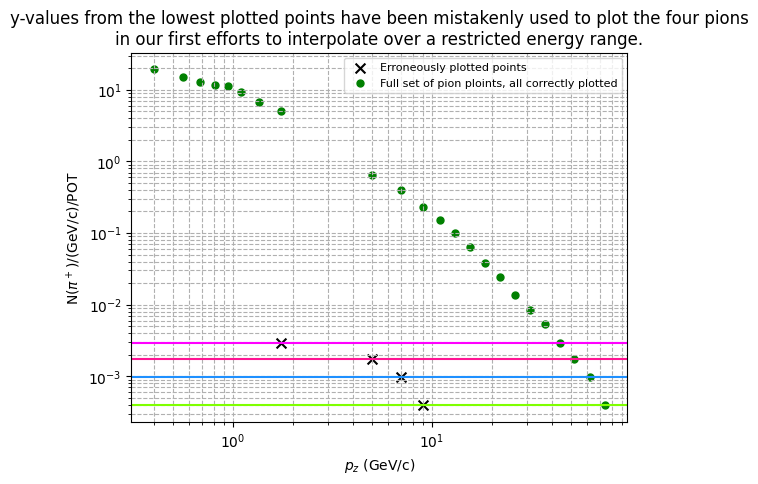

In [152]:
plt.scatter(   x = green_dots_x_only_between_1_5_and_10   ,   y = green_dots_y_only_between_1_5_and_10   ,   c = "black" , marker = "x"  , s = 50 , label =  "Erroneously plotted points" )
plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  "Full set of pion ploints, all correctly plotted" )

plt.title("\n".join(wrap(r"y-values from the lowest plotted points have been mistakenly used to plot" \
                          " the four pions in our first efforts to interpolate over a restricted energy range." , 90 ) ) )


###### HORIZONTAL LINES
color_list = [ "magenta" , "deeppink" , "dodgerblue" , "chartreuse"  ]

zipped_lists = list( zip ( green_dots_y_only_between_1_5_and_10 , color_list ) )

[plt.axhline(  y = i , color = j , linestyle = "-"  ) for i , j in zipped_lists ]
###### HORIZONTAL LINES

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")
plt.legend(fontsize = 8)
plt.grid( True , which = "both" , ls = "--" )
plt.show()


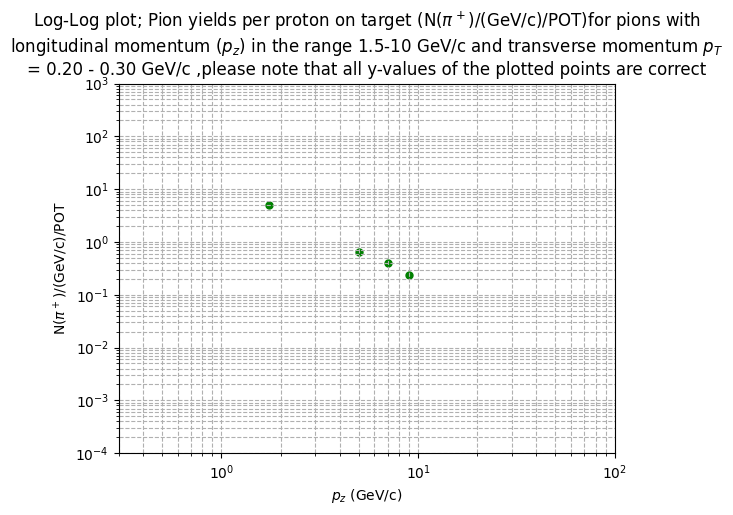

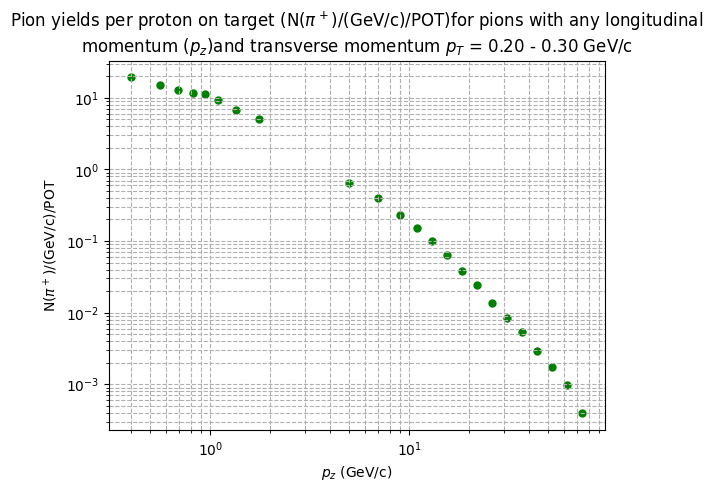

In [153]:
plt.scatter(   x = green_dots_x_1point5_10   ,   y = green_dots_y_1point5_10   ,   c = "green" , s = 25 , label =  labels_list )

plt.title("\n".join(wrap(r"Log-Log plot - THIS IS CORRECT - NOTE THE X VALUES HAVE NOT CHANGED.  ALL THAT HAS CHANGED IS THAT THE Y VALUES HAVE BEEN CORRECTLY SELECTED FROM THE ORIGINAL LIST OF Y VALUES." , 120 ) ) )

plt.title("\n".join(wrap(r"Log-Log plot; Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT)" \
                          "for pions with longitudinal momentum ($p_{z}$) in the range 1.5-10 GeV/c " \
                          "and transverse momentum $p_{T}$ = 0.20 - 0.30 GeV/c ," \
                         "please note that all y-values of the plotted points are correct", 90 ) ) )


plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.3 , 100)
plt.ylim(10e-5 , 10e2)

plt.grid( True , which = "both" , ls = "--" )

plt.show()

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )

plt.title("\n".join(wrap(r"Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT)" \
                          "for pions with any longitudinal momentum ($p_{z}$)" \
                          "and transverse momentum $p_{T}$ = 0.20 - 0.30 GeV/c" , 90 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.xscale("log")
plt.yscale("log")

plt.grid( True , which = "both" , ls = "--" )

plt.show()


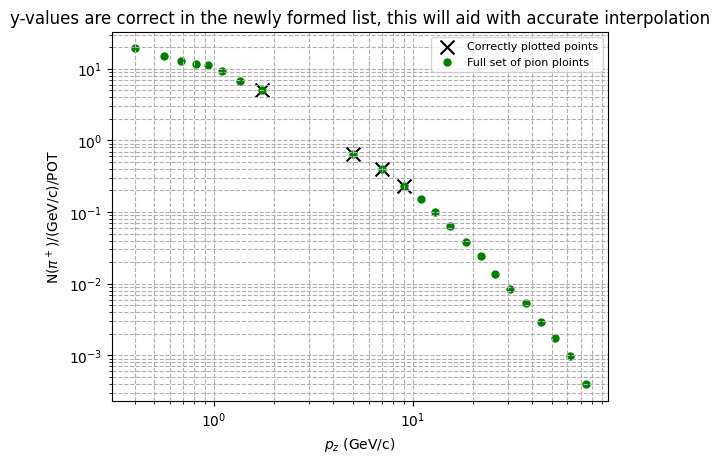

In [155]:
plt.scatter(   x = green_dots_x_1point5_10   ,   y = green_dots_y_1point5_10   ,   c = "black" , marker = "x" , s = 100 , label =  "Correctly plotted points" )

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  "Full set of pion ploints" )

plt.title("\n".join(wrap(r"y-values are correct in the newly formed list, this will aid with accurate interpolation" , 90 ) ) )

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.legend(fontsize = 8)

plt.grid( True , which = "both" , ls = "--" )

plt.show()


# ****WHY IS params_0 NOT DEFINED?  WHY DID WE GO TO THE TROUBLE OF BLOCKING IT FROM BEING READ?


- I will run through the code and leave it how we left it.
- Label all cells stating the code is how we left it.
- Have a play around with different lists of green dot points, so use the different incorrect lists.  Label all cells/ comment all code so that it is clear what is going on.
- I will then run through the code again and insert the new corrected green dots list.
- Perhaps try different coloured dots and see what affect they have on the final histograms plotted.


In [129]:
# print(green_dots_only_x_axis_values_list_10)
# print(green_dots_only_y_axis_values_list_10)

# print(green_dots_x_only_between_1_5_and_10)
# print(green_dots_y_only_between_1_5_and_10)

# print(green_dots_only_x_axis_values_list)
# print(green_dots_only_y_axis_values_list)

# print(green_dots_x_0_10)
# print(green_dots_y_0_10)

# print(green_dots_x_1point5_10)
# print(green_dots_y_1point5_10)

In [156]:
def model_function(t, a, b):

    """This function is an argument of the below mentioned scipy.optimize.curve_fit()
    its arguments must be configured such that the independent variable is first, followed by all parameters to be fitted.

    t: independent variable
    a: a parameter to fit
    b: a parameter to fit

    """
    return a*np.exp(b*t)

### Need to establish purpose of the three cells below.

In [ ]:
######################################################################################################################
######################################################################################################################

                                ## Go through code in this cell.   Do we need it? ##

# green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

# x = green_dots_x_array

# green_dots_y_array = np.array(green_dots_only_y_axis_values_list)

# y = green_dots_y_array

# p0 = [ 15 , -0.5 ]

# params , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

# first_try = -3.75689726e-17*np.exp(1.000 * x)

# print(type(first_try))
# print(np.shape(first_try))

In [ ]:
######################################################################################################################
######################################################################################################################

                                ## Go through code in this cell.   Do we need it? ##

# plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )


# plt.plot( x, model_function(x, p0[0] , p0[1]) )


# plt.plot( x, model_function(x, params[0] , params[1]) )

# plt.xscale("log")
# plt.yscale("log")

In [ ]:
######################################################################################################################
######################################################################################################################

                                ## Go through code in this cell.   Do we need it? ##


# green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

# x = green_dots_x_array

# green_dots_y_array = np.array(green_dots_only_y_axis_values_list)

# y = green_dots_y_array

# p0 = [ 10 , -1 ]

# p1 = [ 30 , -0.25 ]

# params_p0 , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

# params_p1 , _ = scipy.optimize.curve_fit(model_function,  x,  y, p0 = p1 )

# plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  None)

# plt.plot( x, model_function(x, p0[0] , p0[1]) , label =  "First Guess" )

# plt.plot( x, model_function(x, params_p0[0] , params_p0[1])  , color = "red" , label =  "scipy.optimise_p0" )

# plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  color = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

# plt.legend()

# print("This is params_p0", params_p0 , "This is params_1", params_p1 )

# plt.xscale("log")
# plt.yscale("log")

### Need to establish purpose of three cells above

### Established purpose of cells below

Text(0.5, 1.0, 'Linear plot - Note how effective scipy.optimize.curve_fit has been at moving the\nline closer to the green dots')

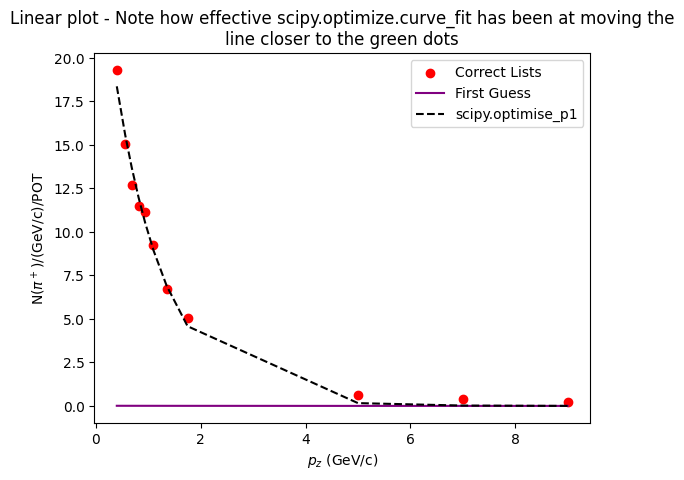

In [157]:
######################################################################################################################
######################################################################################################################

                                ## INCORRECT GREEN DOTS x and y LISTS ##

######################################################################################################################
######################################################################################################################

## green_dots_x_only_between_1_5_and_10  ,  green_dots_y_only_between_1_5_and_10 ##

# green_dots_x_array = np.array(green_dots_x_only_between_1_5_and_10)
# green_dots_y_array = np.array(green_dots_y_only_between_1_5_and_10)

# plt.scatter(   x = green_dots_x_only_between_1_5_and_10   ,   y = green_dots_y_only_between_1_5_and_10   ,   c = "green" , s = 25 , label = "Correct Lists")

######################################################################################################################
######################################################################################################################

## green_dots_only_x_axis_values_list_10  ,  green_dots_only_y_axis_values_list_10 ##

## These lists do not work because the are of different lengths

# green_dots_x_array = np.array(green_dots_only_x_axis_values_list_10)
# green_dots_y_array = np.array(green_dots_only_y_axis_values_list_10)

######################################################################################################################
######################################################################################################################

                                ## CORRECT GREEN DOTS x and y LISTS ##

######################################################################################################################
######################################################################################################################

green_dots_x_array = np.array(green_dots_x_0_10)
green_dots_y_array = np.array(green_dots_y_0_10)

plt.scatter(   x = green_dots_x_0_10   , y = green_dots_y_0_10    ,  c  = "red"   , label = "Correct Lists")


######################################################################################################################
######################################################################################################################

# green_dots_x_array = np.array(green_dots_x_1point5_10)
# green_dots_y_array = np.array(green_dots_y_1point5_10)

# plt.scatter(   x = green_dots_x_1point5_10   , y = green_dots_y_1point5_10    ,  c  = "red"   , label = "Correct Lists")

######################################################################################################################
######################################################################################################################

x = green_dots_x_array
y = green_dots_y_array

######################################################################################################################
######################################################################################################################


#   p0 = [ 10 , -1 ]      ############# What is this? The very first guess.

#   p1 = [ 0.01 , -0.35 ]

first_guess = [ 0.01 , -0.35 ]    ### This guess provides parameters for the model_function.  Then scipy.optimize.curve_fit goes about doing the fitting.

# params_p0 , approx_covariance   =   scipy.optimize.curve_fit(model_function,  x,  y, p0 = p0 )

params_p1 , approx_covariance   =   scipy.optimize.curve_fit(model_function,  x,  y, p0 = first_guess )

## scipy.optimize.curve_fit() selects parameter values that minimise the sum of the squared residuals of "f(xdata, *popt) - ydata" are minimised.



#plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  None)

plt.plot( x, model_function(x, first_guess[0] , first_guess[1]) ,   c = "purple" ,  label =  "First Guess" )

#plt.plot( x, model_function(x, params_p0[0] , params_p0[1])  , color = "red" , label =  "scipy.optimise_p0" )

plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  c = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

plt.legend()

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Linear plot - Note how effective scipy.optimize.curve_fit has been at moving the line closer to the green dots" , 80 ) ) )


# print("This is _", approx_covariance )
# print(type(approx_covariance))
# print(np.shape(approx_covariance))
# print("\n")
# print("This is params_p1", params_p1 )
# print("\n")

# plt.xscale("log")
# plt.yscale("log")
# print(x)
# print(y)

## Would like a smooth interpolated curve in the figure above.

#****I will use the chosen_interpolator deployed above, except this time I shall include all pion data.

In [183]:
def FIRST_TRY_Integral_Weighted_Function( theta ):


        E_v = np.linspace( 0.1 , 10 , 10000000 )

        my_mean = 120   ## This is the correct mean proton energy

        my_std = 1.2  # standard deviation, "spread" or "width" - NEED ACTUAL FIGURE

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta


        #Weighted_Pion_Flux =  chosen_interpolator(P_pi)            ########## What is this "chosen_interpolator"?

        Weighted_Pion_Flux =  model_function(P_pi , *params_p1)


        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux / integral_weights_array

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0


        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux

<ipython-input-174-72e9366dab0f>:12: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


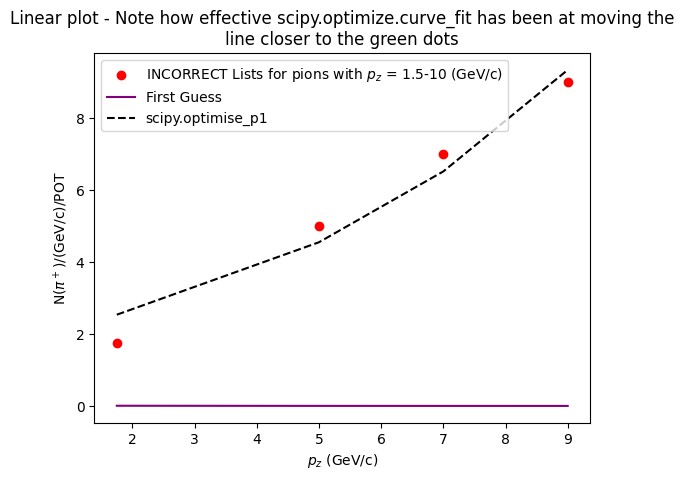

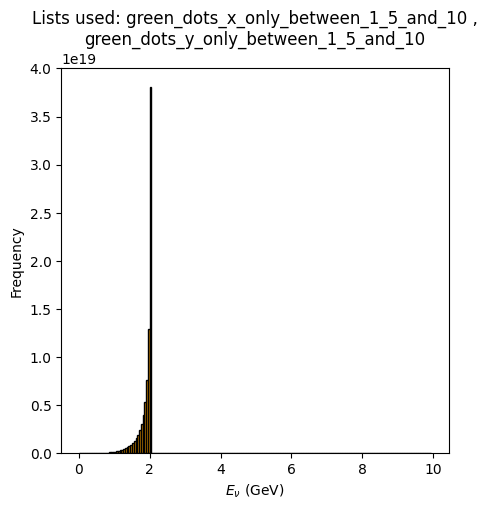

In [175]:
green_dots_x_array = np.array(green_dots_x_only_between_1_5_and_10)
green_dots_y_array = np.array(green_dots_x_only_between_1_5_and_10)

x = green_dots_x_array
y = green_dots_y_array

plt.scatter(   x   , y    ,  c  = "red"   , label = r"INCORRECT Lists for pions with $p_{z}$ = 1.5-10 (GeV/c)")

first_guess = [ 0.01 , -0.35 ]    ### This guess provides parameters for the model_function.  Then scipy.optimize.curve_fit goes about doing the fitting.

params_p1 , approx_covariance   =   scipy.optimize.curve_fit(model_function,  x,  y, p0 = first_guess )

## scipy.optimize.curve_fit() selects parameter values that minimise the sum of the squared residuals of "f(xdata, *popt) - ydata" are minimised.

plt.plot( x, model_function(x, first_guess[0] , first_guess[1]) ,   c = "purple" ,  label =  "First Guess" )

plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  c = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

plt.legend()

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Linear plot - Note how effective scipy.optimize.curve_fit has been at moving the line closer to the green dots" , 80 ) ) )


E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = FIRST_TRY_Integral_Weighted_Function( 0.0146 )
#display((np.shape(y_1)))
plt.figure( figsize = (5, 5) )
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Lists used: green_dots_x_only_between_1_5_and_10 , green_dots_y_only_between_1_5_and_10 " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-174-72e9366dab0f>:12: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


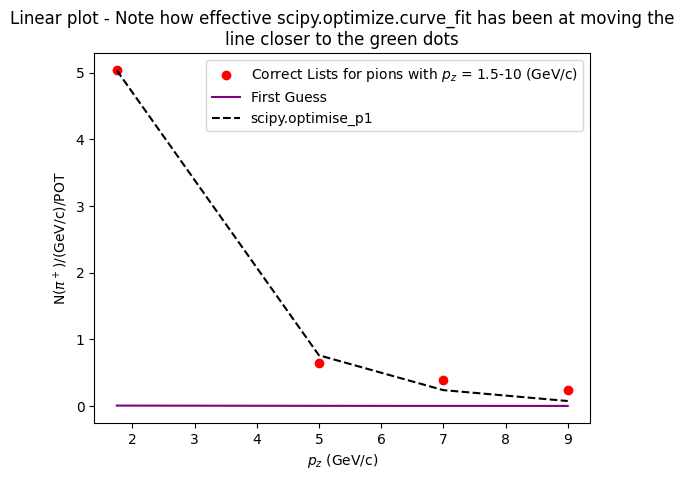

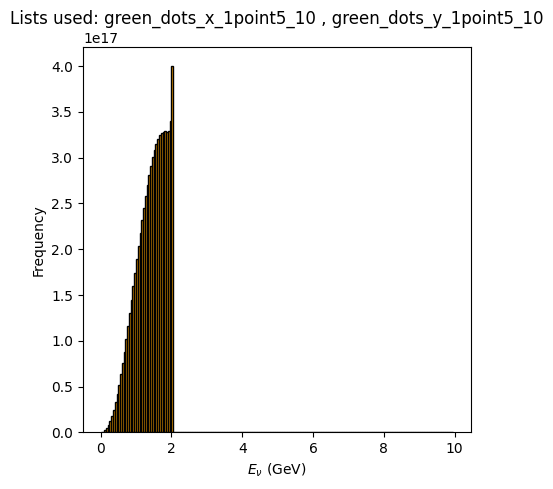

In [176]:
green_dots_x_array = np.array(green_dots_x_1point5_10)
green_dots_y_array = np.array(green_dots_y_1point5_10)

plt.scatter(   x = green_dots_x_1point5_10   , y = green_dots_y_1point5_10    ,  c  = "red"   , label = r"Correct Lists for pions with $p_{z}$ = 1.5-10 (GeV/c)")

x = green_dots_x_array
y = green_dots_y_array

first_guess = [ 0.01 , -0.35 ]    ### This guess provides parameters for the model_function.  Then scipy.optimize.curve_fit goes about doing the fitting.

params_p1 , approx_covariance   =   scipy.optimize.curve_fit(model_function,  x,  y, p0 = first_guess )

## scipy.optimize.curve_fit() selects parameter values that minimise the sum of the squared residuals of "f(xdata, *popt) - ydata" are minimised.

plt.plot( x, model_function(x, first_guess[0] , first_guess[1]) ,   c = "purple" ,  label =  "First Guess" )

plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  c = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

plt.legend()

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Linear plot - Note how effective scipy.optimize.curve_fit has been at moving the line closer to the green dots" , 80 ) ) )


E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = FIRST_TRY_Integral_Weighted_Function( 0.0146 )
#display((np.shape(y_1)))
plt.figure( figsize = (5, 5) )
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Lists used: green_dots_x_1point5_10 , green_dots_y_1point5_10  " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()


<ipython-input-174-72e9366dab0f>:12: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


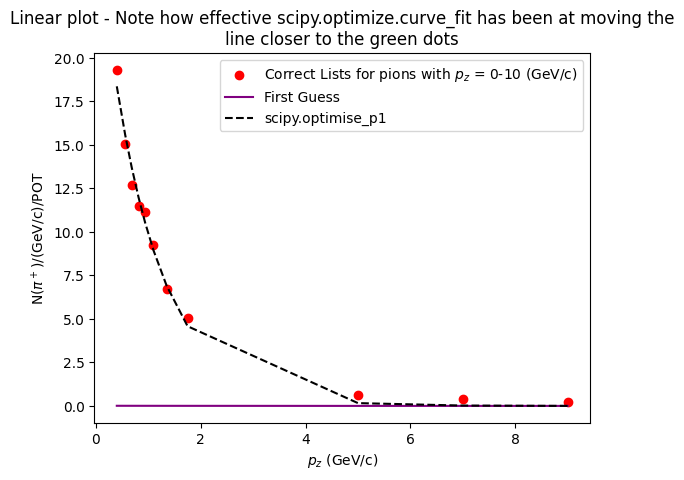

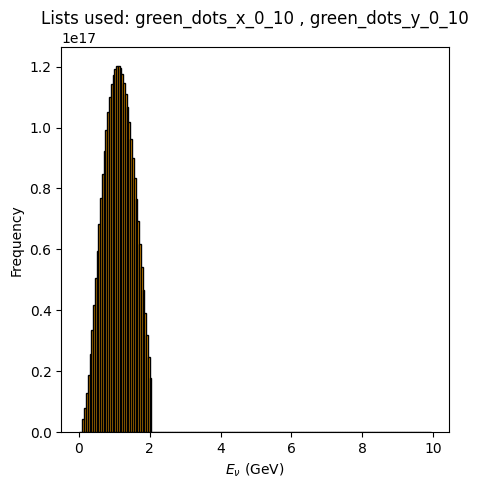

In [180]:
green_dots_x_array = np.array(green_dots_x_0_10)
green_dots_y_array = np.array(green_dots_y_0_10)

plt.scatter(   x = green_dots_x_0_10   , y = green_dots_y_0_10    ,  c  = "red"   , label = r"Correct Lists for pions with $p_{z}$ = 0-10 (GeV/c)")


x = green_dots_x_array
y = green_dots_y_array

first_guess = [ 0.01 , -0.35 ]    ### This guess provides parameters for the model_function.  Then scipy.optimize.curve_fit goes about doing the fitting.

params_p1 , approx_covariance   =   scipy.optimize.curve_fit(model_function,  x,  y, p0 = first_guess )

## scipy.optimize.curve_fit() selects parameter values that minimise the sum of the squared residuals of "f(xdata, *popt) - ydata" are minimised.

plt.plot( x, model_function(x, first_guess[0] , first_guess[1]) ,   c = "purple" ,  label =  "First Guess" )

plt.plot( x, model_function(x, params_p1[0] , params_p1[1])  ,  c = "black" , label =  "scipy.optimise_p1" , linestyle = "--" )

plt.legend()

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.title("\n".join(wrap(r"Linear plot - Note how effective scipy.optimize.curve_fit has been at moving the line closer to the green dots" , 80 ) ) )



E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = FIRST_TRY_Integral_Weighted_Function( 0.0146 )
#display((np.shape(y_1)))
plt.figure( figsize = (5, 5) )
#plt.plot( x_1 , y_1 , "-o" , color = "brown", linewidth = 0.5 , markersize = 1, label = r'$\theta$ = 0.014' )
plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Lists used: green_dots_x_0_10 , green_dots_y_0_10  " , 80 ) ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

# green_dots_x_array = np.array(green_dots_only_x_axis_values_list)

# Seeing if I can improve the above-plotted histograms by interpolating across all green dots in original data set.

<ipython-input-181-d9d78c1e373b>:44: MatplotlibDeprecationWarning: Passing label as a length 7 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(  x_array  , y_array  , color = "black" , label =  labels_list  ,   linewidth = 1  ) # Plotting the interpolator line


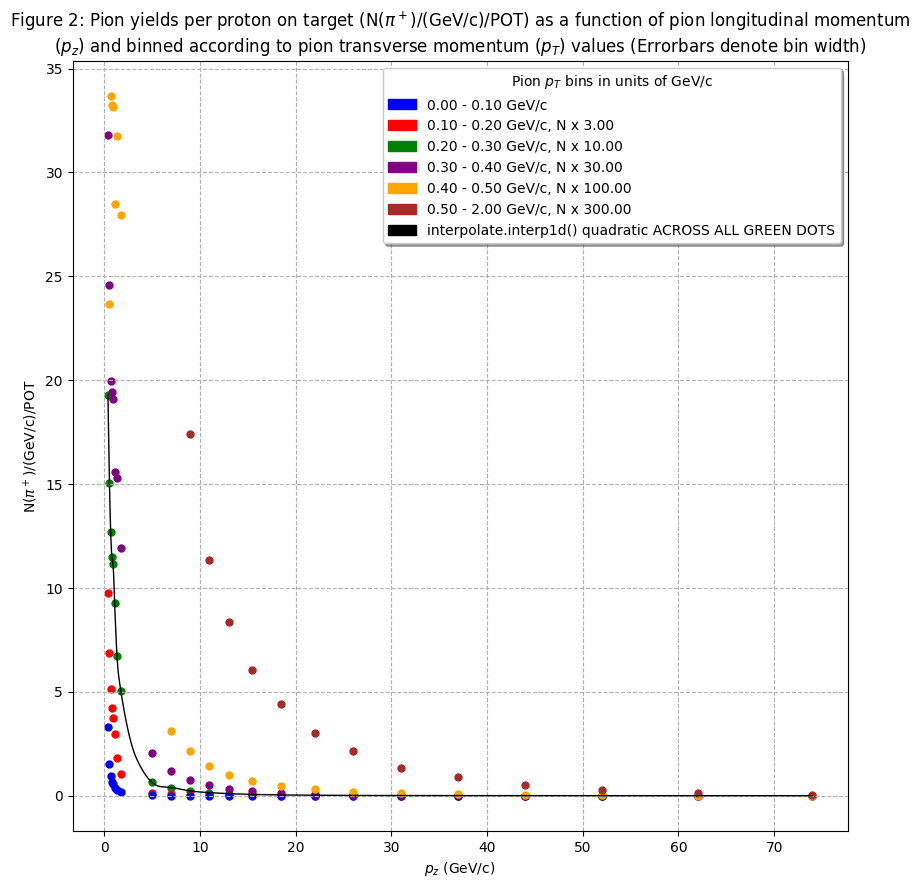

In [181]:
##  Linear PLOT WITHOUT ERROR BARS ##
colours = {  0 : "blue" , 1 : "red" , 2 : "green" , 3 : "purple" , 4 : "orange" , 5 : "brown"  }

labels_list = [ "0.00 - 0.10 GeV/c" , "0.10 - 0.20 GeV/c, N x 3.00"  ,  "0.20 - 0.30 GeV/c, N x 10.00"  ,  "0.30 - 0.40 GeV/c, N x 30.00"  ,  "0.40 - 0.50 GeV/c, N x 100.00"  ,  "0.50 - 2.00 GeV/c, N x 300.00" , "interpolate.interp1d() quadratic ACROSS ALL GREEN DOTS" ]

blue_patch = mpatches.Patch(color='blue', label='0.00 - 0.10 GeV/c' )
red_patch = mpatches.Patch(color='red', label='0.10 - 0.20 GeV/c, N x 3.00')
green_patch = mpatches.Patch(color='green', label='0.20 - 0.30 GeV/c, N x 10.00')
purple_patch = mpatches.Patch(color='purple', label='0.30 - 0.40 GeV/c, N x 30.00')
orange_patch = mpatches.Patch(color='orange', label='0.40 - 0.50 GeV/c, N x 100.00')
brown_patch = mpatches.Patch(color='brown', label='0.50 - 2.00 GeV/c, N x 300.00')
black_patch = mpatches.Patch(color='black', label='interpolate.interp1d() quadratic ACROSS ALL GREEN DOTS')

# handles_for_legend =  [  blue_patch , red_patch ,  green_patch ,  purple_patch , orange_patch , brown_patch  ]

handles_for_legend =  [  blue_patch , red_patch ,  green_patch , purple_patch , orange_patch , brown_patch , black_patch ]


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

#############################################################################################################################
#############################################################################################################################

              ###################### INTERPOLATOR ACROSS ALL GREEN DOTS DEFINED HERE  #################################

x_array = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 1000)
green_dots_x_array = np.array(green_dots_only_x_axis_values_list)
green_dots_y_array = np.array(green_dots_only_y_axis_values_list)
all_dots_interpolator = interpolate.interp1d(   green_dots_x_array  ,    green_dots_y_array , kind = "quadratic" , bounds_error = False  )
y_array = all_dots_interpolator(x_array)

#############################################################################################################################
#############################################################################################################################

plt.scatter(   x = green_dots_only_x_axis_values_list   ,   y = green_dots_only_y_axis_values_list   ,   c = "green" , s = 25 , label =  labels_list )
plt.scatter(   x = red_dots_only_x_axis_values_list   ,   y = red_dots_only_y_axis_values_list   ,   c = "red" , s = 25 , label =  labels_list )
plt.scatter(   x = blue_dots_only_x_axis_values_list   ,   y = blue_dots_only_y_axis_values_list   ,   c = "blue" , s = 25 , label =  labels_list )
plt.scatter(   x = purple_dots_only_x_axis_values_list   ,   y = purple_dots_only_y_axis_values_list   ,   c = "purple" , s = 25 , label =  labels_list )
plt.scatter(   x = orange_dots_only_x_axis_values_list   ,   y = orange_dots_only_y_axis_values_list   ,   c = "orange" , s = 25 , label =  labels_list )
plt.scatter(   x = brown_dots_only_x_axis_values_list   ,   y = brown_dots_only_y_axis_values_list   ,   c = "brown" , s = 25 , label =  labels_list )

plt.plot(  x_array  , y_array  , color = "black" , label =  labels_list  ,   linewidth = 1  ) # Plotting the interpolator line


plt.grid( True , which = "both" , ls = "--" )

plt.legend(  labels = labels_list , handles = handles_for_legend , shadow = True , fancybox = True , title = r"Pion $p_{T}$ bins in units of GeV/c" )

plt.title("\n".join(wrap(r"Figure 2: Pion yields per proton on target (N($\pi^+$)/(GeV/c)/POT) as a function of pion longitudinal momentum ($p_{z}$) and binned according to pion transverse momentum ($p_{T}$) values (Errorbars denote bin width)" , 120 ) ) )

plt.xlabel(r"$p_{z}$ (GeV/c)")
plt.ylabel(r"N($\pi^+$)/(GeV/c)/POT")

plt.savefig('Figure NUMBER NEEDS TO BE ORGANISED: Positive pion yields per proton on target - binned according to pion longitudinal and transverse momenta .png' , dpi=200 , bbox_inches = "tight")

plt.show()

In [210]:
#############################################################################################################################
#############################################################################################################################

              ###################### INTERPOLATOR ACROSS ALL GREEN DOTS DEFINED HERE  #################################

x_array = np.linspace(min(green_dots_only_x_axis_values_list), max(green_dots_only_x_axis_values_list), 1000)
green_dots_x_array = np.array(green_dots_only_x_axis_values_list)
green_dots_y_array = np.array(green_dots_only_y_axis_values_list)
all_dots_interpolator = interpolate.interp1d(   green_dots_x_array  ,    green_dots_y_array , kind = "quadratic" , bounds_error = False  )
y_array = all_dots_interpolator(x_array)

#############################################################################################################################
#############################################################################################################################

In [211]:
def SECOND_TRY_Integral_Weighted_Function( theta ):


        E_v = np.linspace( 0.1 , 10 , 10000000 )

        my_mean = 120   ## This is the correct mean proton energy

        my_std = 1.2  # standard deviation, "spread" or "width" - NEED ACTUAL FIGURE

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta


        #Weighted_Pion_Flux =  chosen_interpolator(P_pi)

        #Weighted_Pion_Flux =  model_function(P_pi , *params_p1)

        Weighted_Pion_Flux =  all_dots_interpolator(P_pi)


        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux / integral_weights_array

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0


        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux

In [216]:
cos(1)

0.5403023058681398

<ipython-input-211-12032df77a29>:12: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


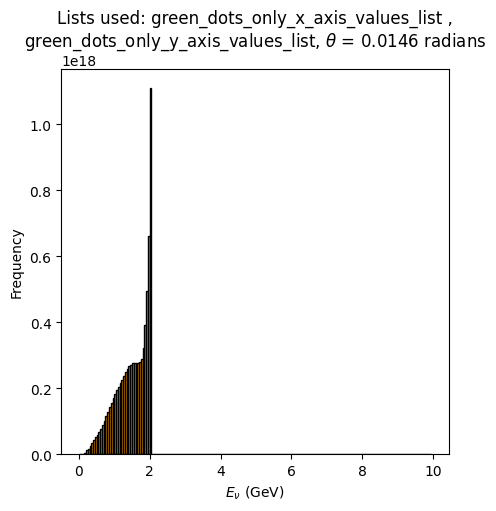

In [215]:
# E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = SECOND_TRY_Integral_Weighted_Function( 0.0146 )

theta = 0.0146

E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = SECOND_TRY_Integral_Weighted_Function( theta )


plt.figure( figsize = (5, 5) )

plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Lists used: green_dots_only_x_axis_values_list , green_dots_only_y_axis_values_list, $\theta$ = {} radians" , 80 ) ).format( theta ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

In [195]:
# green_dots_only_x_axis_values_list
# green_dots_only_y_axis_values_list
# red_dots_only_x_axis_values_list
# red_dots_only_y_axis_values_list
# blue_dots_only_x_axis_values_list
# blue_dots_only_y_axis_values_list
# purple_dots_only_x_axis_values_list
# purple_dots_only_y_axis_values_list
# orange_dots_only_x_axis_values_list
# orange_dots_only_y_axis_values_list
# brown_dots_only_x_axis_values_list
# brown_dots_only_y_axis_values_list

len(purple_dots_only_x_axis_values_list)

23

In [217]:
#############################################################################################################################
#############################################################################################################################

              ###################### INTERPOLATOR ACROSS ALL PURPLE DOTS DEFINED HERE  #################################

x_array = np.linspace(min(purple_dots_only_x_axis_values_list), max(purple_dots_only_x_axis_values_list), 1000)
purple_dots_x_array = np.array(purple_dots_only_x_axis_values_list)
purple_dots_y_array = np.array(purple_dots_only_y_axis_values_list)
all_dots_interpolator = interpolate.interp1d(   purple_dots_x_array  ,    purple_dots_y_array , kind = "quadratic" , bounds_error = False  )
y_array = all_dots_interpolator(x_array)

#############################################################################################################################
#############################################################################################################################

In [218]:
def SECOND_TRY_Integral_Weighted_Function( theta ):


        E_v = np.linspace( 0.1 , 10 , 10000000 )

        my_mean = 120   ## This is the correct mean proton energy

        my_std = 1.2  # standard deviation, "spread" or "width" - NEED ACTUAL FIGURE

        E_pro_array = np.random.normal(loc = my_mean, scale = my_std, size=10000000) ## Producing an array of proton energies.

        cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )

        E_pi = (  (m_pi * E_v )    /  (   E_v_star * ( 1 + cos_theta_star )  )   )

        P_pi = ( ( ( E_pi **2 )  -  ( m_pi **2 )  ) ** ( 1 / 2 ) )   # Convert energies to momenta - BECAUSE the data taken from the reference is a table with longitudinal pion momenta


        #Weighted_Pion_Flux =  chosen_interpolator(P_pi)

        #Weighted_Pion_Flux =  model_function(P_pi , *params_p1)

        Weighted_Pion_Flux =  all_dots_interpolator(P_pi)


        Rel_Neu_Flux = ( ( ( E_pro_array - E_pi ) ** 5 ) * ( ( E_pi * E_v ) / ( cos_theta_star ) ) )   ## Proton energy array is now included ##

        Rel_Neu_Flux = Weighted_Pion_Flux * Rel_Neu_Flux / integral_weights_array

        Rel_Neu_Flux[np.isnan(Rel_Neu_Flux)] = 0


        return  E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux

<ipython-input-218-12032df77a29>:12: RuntimeWarning: invalid value encountered in sqrt
  cos_theta_star = (  ( 1 - ( ( E_v ** 2 ) / ( E_v_star ** 2 ) ) * ( ( 1 / ( ( cos(theta) ) ** 2 ) ) - 1 ) ) ** ( 1 / 2 ) )


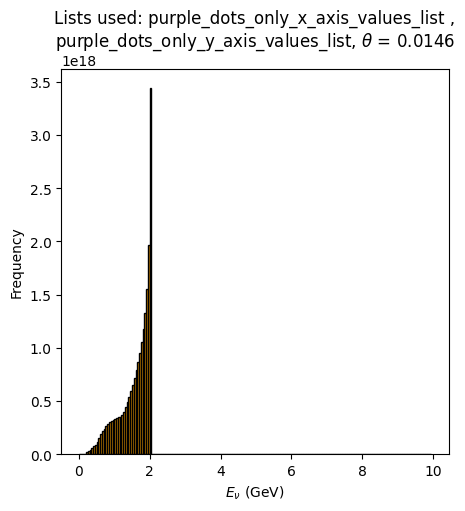

In [219]:
# E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = SECOND_TRY_Integral_Weighted_Function( 0.0146 )

# theta = 0.02
theta = 0.0146

E_v , Rel_Neu_Flux , E_pro_array , E_pi , Weighted_Pion_Flux = SECOND_TRY_Integral_Weighted_Function( theta )

plt.figure( figsize = (5, 5) )

plt.hist( E_v  , bins = np.arange( 0 , 10 , 0.05 )  , weights =  Rel_Neu_Flux , edgecolor = "black" , ls = "-" , color = "orange" )
plt.title("\n".join(wrap(r"Lists used: purple_dots_only_x_axis_values_list , purple_dots_only_y_axis_values_list, $\theta$ = {}  " , 80 ) ).format( theta ) )
plt.xlabel(r"$E_{\nu}$ (GeV)")
plt.ylabel("Frequency")
plt.show()

#TO DO LIST AS OF 31ST JANUARY 2025 - 18:27:
#
#
# Need to figure out what is going on with the tangent function in terms of the weighting it is applying to the pions.
# Notebook might be helpful for this.
# Then finally.... attempt to code up the decay tube physics of the pions...

#  New Laptop needs VScode.
#  Sort out scripts so that my code is neatly divided into more manageable chunks.





#Things to do:  [See Google Sheets file in Week 9 Final Project Folder for this same list]

-1) BUY LAPTOP.  INSTALL VSCODE.  START USING SCRIPTS.  easy.

0) TIDY UP YOUR CODE.  ADD COMMENTS.  NEATLY DEFINE ALL FUNCTIONS... NEATLY AND LOGICALLY NAME VARIABLES.

1) Plot a different graph using a linear scale.  This is the graph of the pion longitudinal momenta data.   My current plot is log-log.  I can still use this plot in the report, but I need to go to a linear scale to better interpolate... and hopefully produce histograms that replicate real world measurements at the near NOVA detector.

2) Fit an exponential to all of the data.  So, for all the green dots, or all the red dots, or whatever colour.

3) Theta_detector and Theta_max ... the relative sizes of these two angles determines if all neutrinos hit detector.  The relative sizes of the angles also determines if one should be divided by the other or not.  If Theta_detector is smaller than Theta_max, we need to do Theta_detector / Theta_max  in order to get the proportion of neutrinos that actually arrive at the detector.

4) Then determine a small cut off angle called epsilon.  Have all angles above this epsilon receive a reducing weighting.  All angles below this epsilon should have no weighting at all.

5) I think she was saying that epsilon is Theta_detector.

6) Then work on producing more histograms for on and off axis.

7) See if your plots have a nice natural drop off, rather than the sharp sudden cut off they currently exhibit.

8) NOTE ON THE INTERPOLATOR:  FEATURING ALL THE DATA POINTS SHOULDD TAKE CARE OF THE LOWER ENERGY PIONS AND WILL HOPEFULLY LEADD TO LOWEER ENERGY NEUTRINOS BEING PRODUCED IN THE SIMULATION.  I.E., THE HISTOGRAMS WILL LOOK MORE NATURAL AND LESS SPIKEY.


9) Complete Checkpoint 1 to Abbey.

10) Send Checkpoint 1 to Abbey.

11) Start to write out the introduction.  Include a brief historical account full of citations... preferentially the original papers that first discussed the neutrino.

12) MOVE ON TO NEXT CHALLENGE... THE DACAY TUBE PHYSICS... (SEE NOTES TAKEN IN MEETING)

13) ALSO see document Abbey sent you referring to page 27


### Need to add the code in the notebook titled:

#Last Modified Thursday 12th December - Week 9 - Numerical Integration - Further weighting work - All in the pursuit of physically representative histograms.ipynb
.
.
.
###Once you have gone through the code in the above mentioend notebook, you then need to plot histograms with it.
###Then you need to incorporate the trignometry involving detector dimensions.
###Then try to add the pion decay tube behaviour.
